# Deep Neural Network<br>
Deep neural network 구현

## MNIST dataset 불러 오기 및 시각화

In [86]:
from __future__ import print_function

import torch
from torch import nn
from torch import optim
import numpy as np

import time

# dataset
import torchvision 
from torchvision import datasets
from torchvision import transforms

import pandas as pd
import matplotlib.pyplot as plt


## Hyperparameter
modeling 과정에서 직접 설정하는 값입니다.<br>
- batch_size
- learning rate : 학습률(gradient를 통해 weight를 이동, 변화시키는 정도)
- epoch_nums : 학습을 반복하는 횟수
- batch size : 한번의 batch마다 주어지는 data sample의 size (batch: 나누어진 dataset)
- momentum : weight의 update과정에서 관성, 가속도를 주어 감소, 증가하는 방향으로 더 많은 변화를 준다.

In [87]:
batch_size = 10
# batch_size = 32
# learning_rate = 0.01
learning_rate = 0.005
# learning_rate = 0.1
epoch_num = 15
# epoch_num = 20

In [ ]:
batch_size = 10
learning_rate = 0.005
epoch_num = 15

## MNIST dataset
### torchvision.datasets.MNIST = (root="", train="", dawnload="",trasform ="")
root = "data의 경로" <br>
train = True(학습용 데이터) or False(test용 데이터) <br>
tramsform - 데이터 형태 <br>
download = True(MNIST dataset이 없으면 다운로드한다.) <br>

In [88]:
train_data = datasets.MNIST(root= '..\datasets', train= True, download= True, transform= transforms.ToTensor())
test_data = datasets.MNIST(root= '..\datasets', train= False, download= True, transform= transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# Deep Neural Network
input layer와 ouput layer사이에 hidden layer를 2개이상 지닌 neural network을 의미합니다.
- 분류와 수치예측을 주목적으로 하여 이미지 학습과 문자인식에 유용하게 사용되고 있는 신경망입니다.

## Using squential 
squential하여 내부  module에 접급하지 않는다.

## Using ModuleList
Module을 리스트 형태로 담을 때 사용합니다. ModuleList에서는 module하나하나에 접근이 가능하다.

In [89]:
# Using ModuleList
# class DeepNN_ML(nn.Module):
#     def __init__(self):
#         super(DeepNN_ML, self).__init__()

#         self.in_dim = 28 * 28 # MNIST
#         self.out_dim = 10 # 0 ~ 9

#         self.list = nn.ModuleList([
#             nn.Linear(in_features = self.in_dim, out_features = 512),
#             nn.ReLU(),
#             nn.Linear(in_features = 512, out_features = 256),
#             nn.ReLU(),
#             nn.Linear(in_features = 256, out_features = 128),
#             nn.ReLU(),
#             nn.Linear(in_features = 128, out_features = 64),
#             nn.ReLU(),

#             nn.Linear(in_features = 64, out_features = self.out_dim)
#         ])

#     def forward(self, x):
#         fw = x.view(-1, self.in_dim)
#         for i, module in enumerate(self.list):
#             fw = module(fw)

#         return fw



In [90]:
# Using ModuleList
class DeepNN_ML(nn.Module):
    def __init__(self, hidden_units=[512, 256, 128, 64]):
        super(DeepNN_ML, self).__init__()

        self.in_dim = 28 * 28 # MNIST
        self.out_dim = 10 # 0 ~ 9

        self.len = len(hidden_units) - 2
        
        self.relu = nn.ReLU()
        self.fl = nn.Linear(in_features = hidden_units[-1], out_features = self.out_dim)

        hidden_units.insert(0, self.in_dim)
        
        self.list = nn.ModuleList([
            nn.Linear(in_features = in_f, out_features = out_f) for in_f, out_f in zip(hidden_units, hidden_units[1:])
        ])  


    def forward(self, x):
        fw = x.view(-1, self.in_dim)
        for i, module in enumerate(self.list):
            fw = self.relu(module(fw))
            
        fw = self.fl(fw)
        return fw



In [92]:
HiddenUnitsList = [[256],[256,64],[256,128,64],[512,256,128,64],[512,256,128,64,32]]
ModelList = []
for hidden_units in HiddenUnitsList:
    model = DeepNN_ML(hidden_units)
    ModelList.append(model)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(ModelList[-1].parameters(), lr = learning_rate)

    for epoch in range(epoch_num):
        running_loss = 0.0
        for i, data in enumerate(train_loader,0):
            # get the inputs: data is a list of [input, label]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward, backward, optimizer
            outputs = ModelList[-1](inputs)
            loss = criterion(outputs, labels) # loss
            loss.backward() # backward
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (i+1) % 2000 == 0 : # print every 2000 mini-batch
                print("[%d, %5d] loss: %.3f" % (epoch+1, i+1, running_loss/2000) )
                running_loss = 0.0

    print("Finished training Networt # of layers:", hidden_units)

[1,  2000] loss: 1.194
[1,  4000] loss: 0.477
[1,  6000] loss: 0.388
[2,  2000] loss: 0.352
[2,  4000] loss: 0.324
[2,  6000] loss: 0.304
[3,  2000] loss: 0.288
[3,  4000] loss: 0.281
[3,  6000] loss: 0.267
[4,  2000] loss: 0.252
[4,  4000] loss: 0.250
[4,  6000] loss: 0.235
[5,  2000] loss: 0.230
[5,  4000] loss: 0.218
[5,  6000] loss: 0.210
[6,  2000] loss: 0.207
[6,  4000] loss: 0.197
[6,  6000] loss: 0.188
[7,  2000] loss: 0.177
[7,  4000] loss: 0.181
[7,  6000] loss: 0.179
[8,  2000] loss: 0.166
[8,  4000] loss: 0.161
[8,  6000] loss: 0.164
[9,  2000] loss: 0.151
[9,  4000] loss: 0.153
[9,  6000] loss: 0.148
[10,  2000] loss: 0.142
[10,  4000] loss: 0.141
[10,  6000] loss: 0.135
[11,  2000] loss: 0.133
[11,  4000] loss: 0.126
[11,  6000] loss: 0.129
[12,  2000] loss: 0.121
[12,  4000] loss: 0.118
[12,  6000] loss: 0.123
[13,  2000] loss: 0.114
[13,  4000] loss: 0.111
[13,  6000] loss: 0.114
[14,  2000] loss: 0.105
[14,  4000] loss: 0.105
[14,  6000] loss: 0.109
[15,  2000] loss: 0

TEST

In [96]:
Accuracy = []
for i,model in enumerate(ModelList):
    n_predict = 0
    n_correct = 0
    model.epochs = 10
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        n_predict += len(predicted)
        n_correct += (labels == predicted).sum()

    print(f"{n_correct}/{n_predict}")
    print(f"Accuracy:{n_correct/n_predict:.3f}")
    Accuracy.append(n_correct/n_predict)

9688/10000
Accuracy:0.969
9743/10000
Accuracy:0.974
9778/10000
Accuracy:0.978
9748/10000
Accuracy:0.975
9703/10000
Accuracy:0.970


In [106]:
def graph(data):
    plt.figure(figsize=(18,6))
    plt.plot(range(2,7),data)

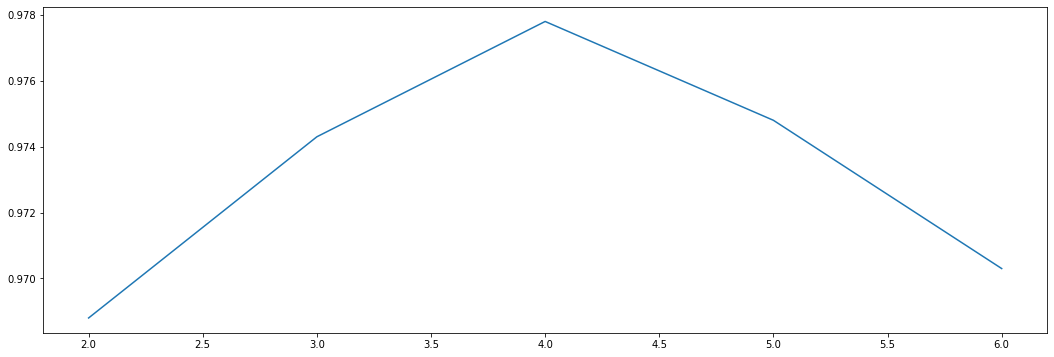

In [107]:
graph(Accuracy)